In [34]:
# Import Different packages
import quandl, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression

import datetime


In [35]:
# Selecting Style
style.use('ggplot')
# Importing Data from Dataset
quandl.ApiConfig.api_key = "LUyuuU3vNsP2WxtLrVtc"
df = quandl.get("WIKI/AMZN")
print("We are In Amazon World....")
print(df)
print("We are coming out of Amazon World")

We are In Amazon World....
               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
1997-05-16    22.38    23.75    20.50    20.75  1225000.0          0.0   
1997-05-19    20.50    21.25    19.50    20.50   508900.0          0.0   
1997-05-20    20.75    21.00    19.63    19.63   455600.0          0.0   
1997-05-21    19.25    19.75    16.50    17.13  1571100.0          0.0   
1997-05-22    17.25    17.38    15.75    16.75   981400.0          0.0   
...             ...      ...      ...      ...        ...          ...   
2018-03-21  1586.45  1590.00  1563.17  1581.86  4667291.0          0.0   
2018-03-22  1565.47  1573.85  1542.40  1544.10  6177737.0          0.0   
2018-03-23  1539.01  1549.02  1495.36  1495.56  7843966.0          0.0   
2018-03-26  1530.00  1556.99  1499.25  1555.86  5547618.0          0.0   
2018-03-27  1572.40  1575.96  1482.32  1497.05  6793279.0          0.0   

          

In [36]:
from ipykernel import kernelapp as app
"""
## We will usiing adjusted values only as it gives better results.
# Selected Features are 
- Adj. Open
- Adj. Close
- Adj. Low
- Adj. High
- Adj. Volume
- Ex-Divident
"""
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume', 'Ex-Dividend']]
print("Printing Seleccted Features....")
print(df)
print("End of Selected Features!!!")
df['H_L_PERCENTAGE'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0
df['PERCENTAGE_CHANGE'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

# Creating final Feature sets after Preprocessing or Reduced Feature set
df = df[['Adj. Close', 'H_L_PERCENTAGE', 'PERCENTAGE_CHANGE', 'Adj. Volume', 'Ex-Dividend']]
forecast_col = 'Adj. Close'


Printing Seleccted Features....
              Adj. Open    Adj. High     Adj. Low   Adj. Close  Adj. Volume  \
Date                                                                          
1997-05-16     1.865000     1.979167     1.708333     1.729167   14700000.0   
1997-05-19     1.708333     1.770833     1.625000     1.708333    6106800.0   
1997-05-20     1.729167     1.750000     1.635833     1.635833    5467200.0   
1997-05-21     1.604167     1.645833     1.375000     1.427500   18853200.0   
1997-05-22     1.437500     1.448333     1.312500     1.395833   11776800.0   
...                 ...          ...          ...          ...          ...   
2018-03-21  1586.450000  1590.000000  1563.170000  1581.860000    4667291.0   
2018-03-22  1565.470000  1573.850000  1542.400000  1544.100000    6177737.0   
2018-03-23  1539.010000  1549.020000  1495.360000  1495.560000    7843966.0   
2018-03-26  1530.000000  1556.990000  1499.250000  1555.860000    5547618.0   
2018-03-27  1572.400

In [37]:
# Fill NAN data with some value
df.fillna(value= -99999, inplace = True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)


In [38]:
"""
##Features
- Create Label X 
- Convert this input data in numpy array
- Preprocess the data by scaling it
- Create Label Y
"""
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])
print(y)


[   2.41666667    2.3125        2.20833333 ... 1495.56       1555.86
 1497.05      ]


In [39]:
"""
## Select Algorithm based on data Analysis
- Split Training and Testing data
- We will be using Linear Regression as this regression problem
- Training Data : 70%
- Testing Data : 30%
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(3636, 5) (3636,)
(1559, 5) (1559,)


In [41]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

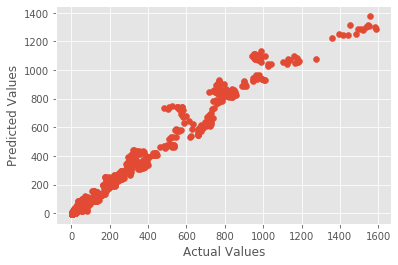

In [45]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [46]:
# print the accuracy score
accuracy = model.score(X_test, y_test)
print(accuracy)

0.976210391957835


Cross-validated scores: [1. 1. 1. 1. 1. 1.]


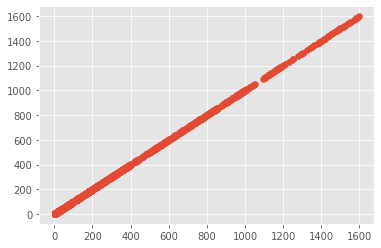

In [49]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print('Cross-validated scores:', scores)
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)


In [50]:
accuracy1 = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy1)

Cross-Predicted Accuracy: 1.0
